In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
from scipy import stats


with open('../get_effect/result/mind/policy_effect_random_o2j1500.pkl', 'rb') as file:
    peo2jrandom = pickle.load(file)
with open('../../data/i2cdf.pkl', 'rb') as file:
    i2c = pickle.load(file)
news = pd.read_csv('../../data/all_news.csv').set_index('i')
nv,nj = 16,16

# ---------- 16x16 ---------- #

effect_arr, num_arr = np.zeros((16,16)), np.zeros((16,16))
for a in tqdm.tqdm(list(range(nv))):
    for b in tqdm.tqdm(list(range(nj))):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in i2c.index or i2c.loc[j][0]!= b:
                continue
            for v in peo2jrandom[j]:
                # 类似的问题!
                if v not in i2c.index or i2c.loc[v][0]!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        effect_arr[a,b] = ave_effect
        num_arr[a,b] = len(v_effect)

# ---------- 16x2 ---------- #

effect_16_2_arr, count_16_2_arr = np.zeros((16,2)), np.zeros((16,2))
for a in tqdm.tqdm(list(range(nv))):
    alist_effect, alist_count = [], []
    for b in tqdm.tqdm(['notpoli','poli']):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in news.index or news.loc[j,'p']!= b:
                continue
            for v in peo2jrandom[j]:
                if v not in i2c.index or i2c.loc[v][0]!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        alist_effect.append(ave_effect)
        alist_count.append(count)
    effect_16_2_arr[a] = np.array(alist_effect)
    count_16_2_arr[a] = np.array(alist_count)

# ---------- 2x16 ---------- #

effect_2_16_arr, count_2_16_arr = np.zeros((2,16)), np.zeros((2,16))
offset = 0
for a in tqdm.tqdm(['notpoli','poli']):
    alist_effect, alist_count = [], []
    for b in tqdm.tqdm(list(range(nv))):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in i2c.index or i2c.loc[j][0]!= b:
                continue
            for v in peo2jrandom[j]:
                if v not in news.index or news.loc[v,'p']!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        alist_effect.append(ave_effect)
        alist_count.append(count)
    effect_2_16_arr[offset] = np.array(alist_effect)
    count_2_16_arr[offset] = np.array(alist_count)
    offset += 1

# ---------- 2x2 ---------- #

effect_2_2_arr, count_2_2_arr = np.zeros((2,2)), np.zeros((2,2))
alist_effect, alist_count = [], []
for a in tqdm.tqdm(['notpoli','poli']):
    for b in tqdm.tqdm(['notpoli','poli']):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in news.index or news.loc[j,'p']!= b:
                continue
            for v in peo2jrandom[j]:
                if v not in news.index or news.loc[v,'p']!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        alist_effect.append(ave_effect)
        alist_count.append(count)

effect_2_2_arr = np.array(alist_effect).reshape((2,2))
count_2_2_arr = np.array(alist_count).reshape((2,2))
affecting_arr_16 = np.sum(effect_arr*num_arr,axis=1).squeeze() / np.sum(num_arr,axis=1).squeeze()
affected_arr_16 = np.sum(effect_arr*num_arr,axis=0).squeeze() / np.sum(num_arr,axis=0).squeeze()
affecting_arr_2 = np.sum(effect_2_16_arr*count_2_16_arr,axis=1).squeeze() / np.sum(count_2_16_arr,axis=1).squeeze()
affected_arr_2 = np.sum(effect_16_2_arr*count_16_2_arr,axis=0).squeeze() / np.sum(count_16_2_arr,axis=0).squeeze()

100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
/tmp/ipykernel_72061/3387919886.py:114: RuntimeWarning: invalid value encountered in true_divide
  affected_arr_16 = np.sum(effect_arr*num_arr,axis=0).squeeze() / np.sum(num_arr,axis=0).squeeze()


<Figure size 640x480 with 0 Axes>

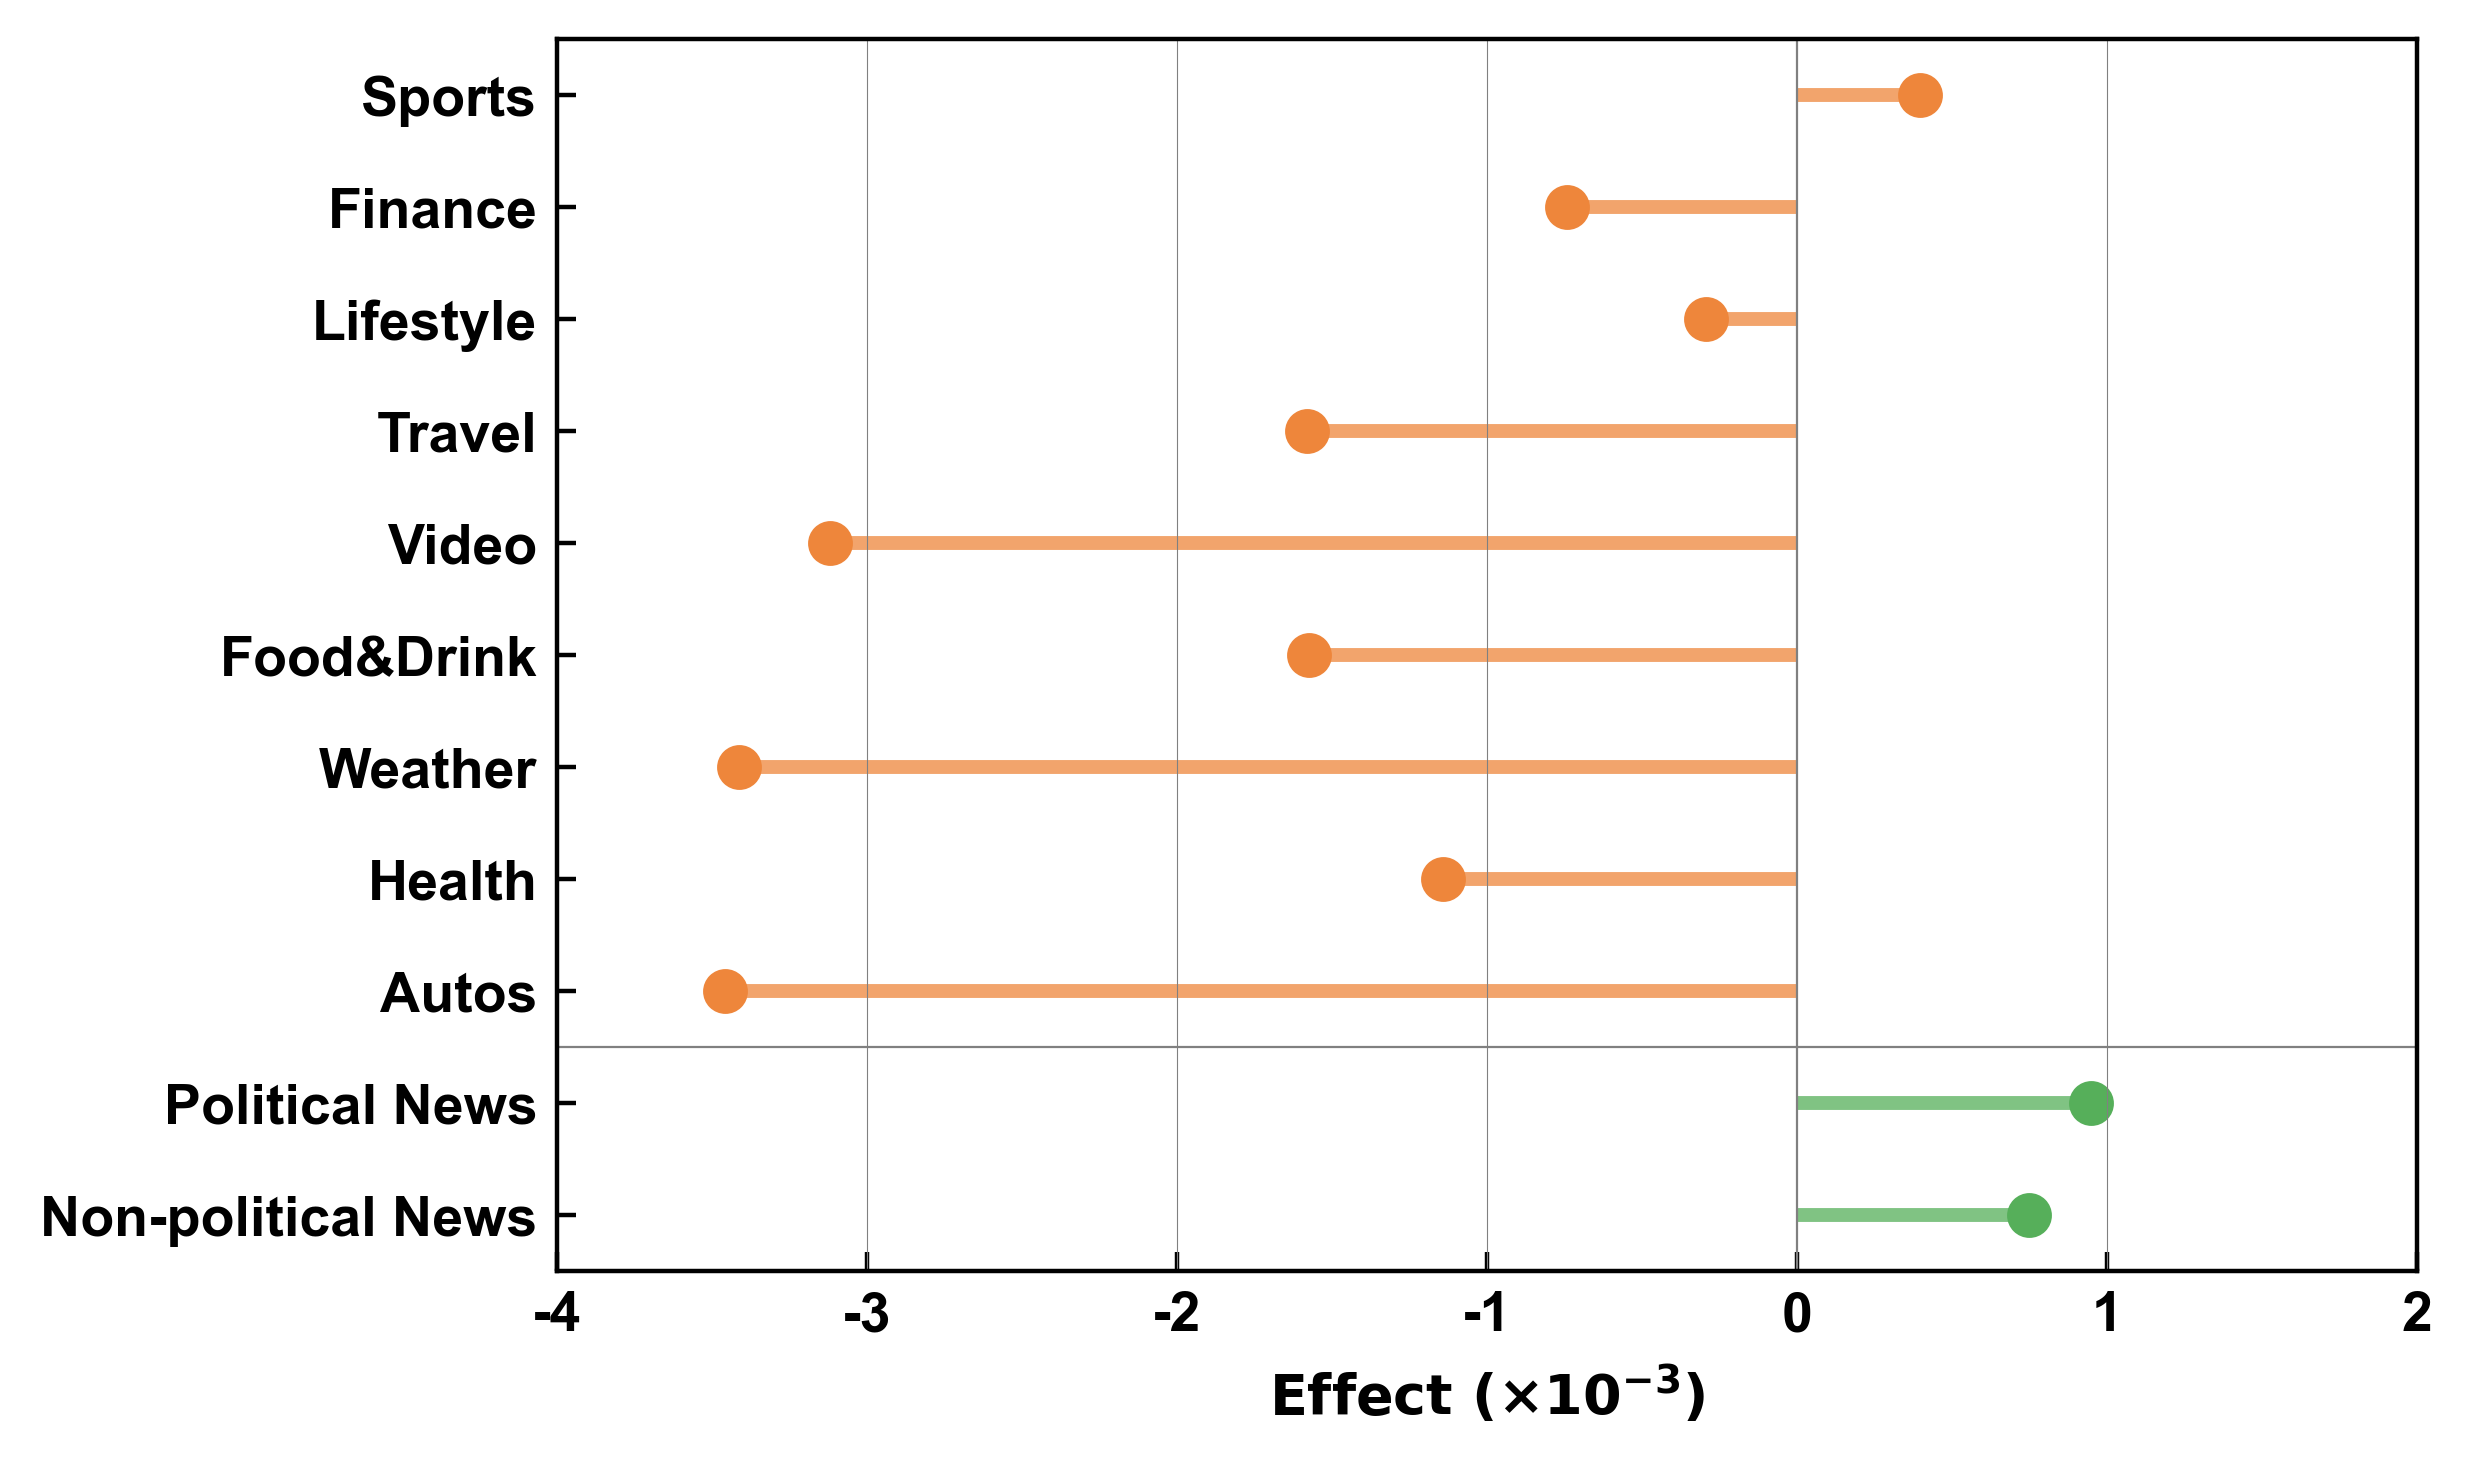

In [2]:
plt.figure()
fig, ax = plt.subplots(figsize=(6,4),dpi=400)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

sorted_indices = np.array([3,1,9,5,12,6,0,8,7])
# LABELS = np.array(['lifestyle', 'health', 'news', 'autos', 'tv', 'foodanddrink', 'travel', 'sports', 'finance', 'weather', 'movies', 'entertainment', 'video', 'kids', 'music', 'northamerica'])
LABELS = np.array(['Lifestyle', 'Health', 'News', 'Autos', 'TV', 'Food&Drink', 'Travel', 'Sports', 'Finance', 'Weather', 'Movies', 'Entertainment', 'Video', 'Kids', 'Music', 'North America'])
affecting_arr = affecting_arr_16[sorted_indices]

#5154A6','#56AF5A' #EE863B ef8a62 d8b365
ax.hlines(y=[i+2 for i in range(9)], xmin=0, xmax=affecting_arr, color='#EE863B', alpha=0.75, ls='-', lw=2.5)
ax.scatter(affecting_arr, [i+2 for i in range(9)], color='#EE863B', s=50, alpha=1)
ax.hlines(y=[0,1], xmin=0, xmax=affecting_arr_2, color='#56AF5A', alpha=0.75, ls='-', lw=2.5)
ax.scatter(affecting_arr_2, [0,1], color='#56AF5A', s=50, alpha=1)

ax.set_xlim((-0.004,0.002))
ax.set_xticks([-0.004,-0.003,-0.002,-0.001,0,0.001,0.002],labels=['-4','-3','-2','-1','0','1','2'])
ax.set_yticks([i for i in range(11)], ['Non-political News','Political News']+list(LABELS[sorted_indices]))
ax.hlines(y=1.5, xmin=-0.004, xmax=0.002, color='grey', ls='-', lw=0.4)
ax.set_xlabel(r'Effect $\mathbf{(\times 10^{-3})}$', weight='bold')
# ax.set_title('Top 10 Categories of All Articles')

plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')

plt.axvline(x=0, c="grey", ls="-", lw=0.4)
plt.axvline(x=-0.003, c="grey", ls="-", lw=0.2)
plt.axvline(x=-0.002, c="grey", ls="-", lw=0.2)
plt.axvline(x=-0.001, c="grey", ls="-", lw=0.2)
plt.axvline(x=0.001, c="grey", ls="-", lw=0.2)

plt.savefig('./figures/category_vs_allnews_S4.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()